In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split# train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#  path to the dataset 
file = './datasets/Apprentice_chef_Dataset.xlsx'
#reading the file into python 
my_df = pd.read_excel(file)

In [2]:
#Missing Value Analysis
my_df.isnull().sum(axis=0)
#dropped dataset 
my_df = my_df.dropna()
my_df.isnull().any().any()

False

In [3]:
#saving the dataest to excel 
my_df.to_excel("apprentice_chef_data_without_na.xlsx", index = False)
#updating my df to ensure no missing values are taken forward
my_df = pd.read_excel('apprentice_chef_data_without_na.xlsx')

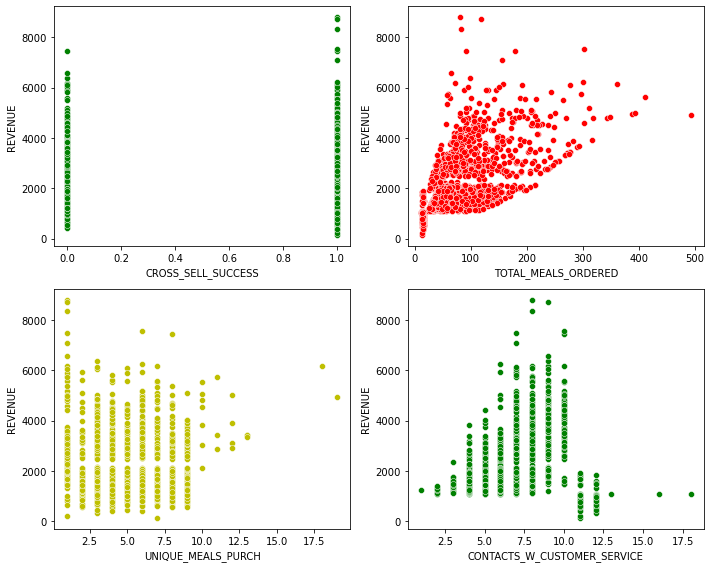

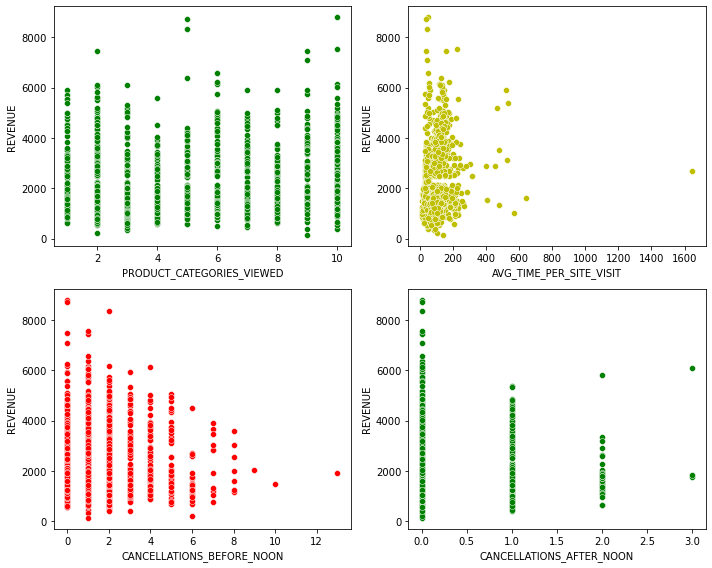

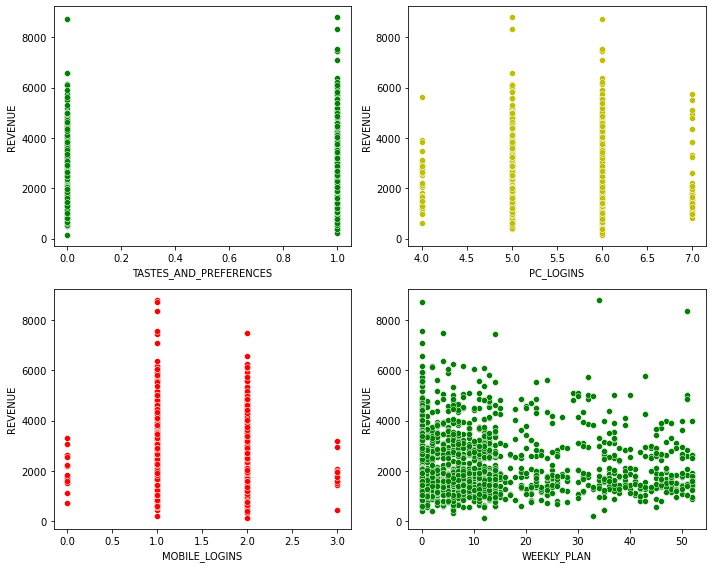

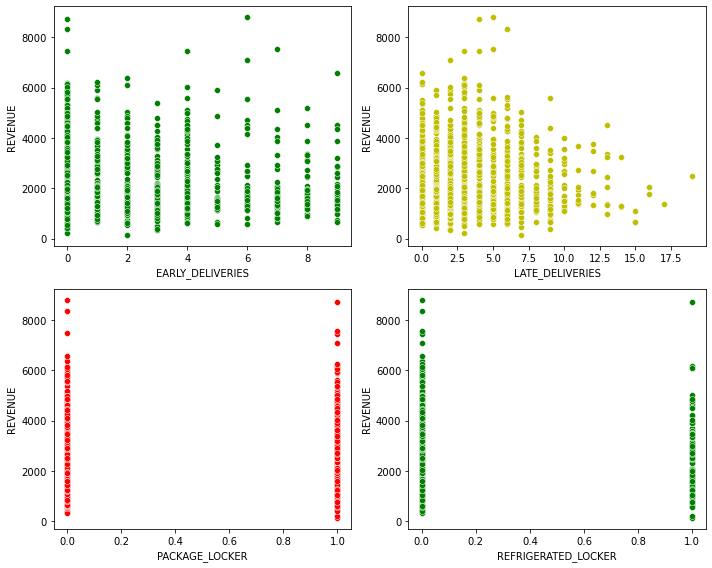

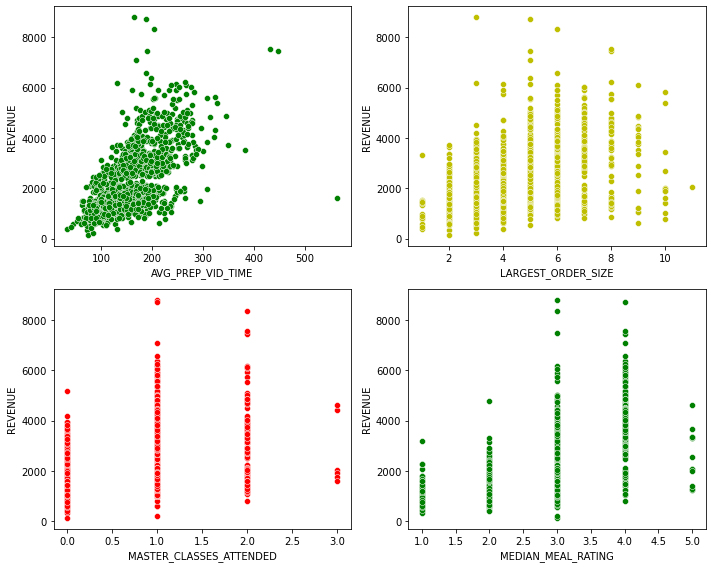

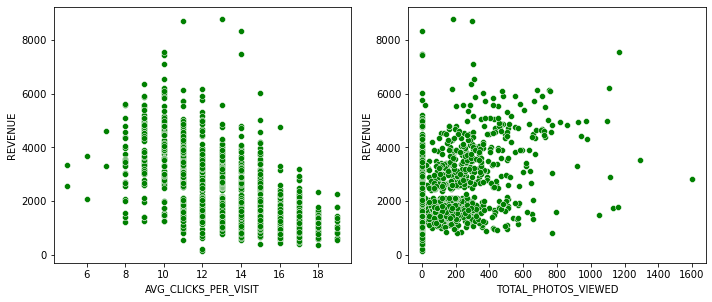

In [4]:
#feature engineering - outlier detection 
#Visual EDA - Scatter plots 

#Setting plot size 
fig, ax = plt.subplots(figsize=(10,8))
#CROSS_SELL- REVENUE 
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['CROSS_SELL_SUCCESS'],
                y = my_df['REVENUE'],
                color = 'g')
#TOTAL_MEALS_ORDERED
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['TOTAL_MEALS_ORDERED'],
                y = my_df['REVENUE'],
                color = 'r')
#UNIQUE_MEALS_PURCH
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df['UNIQUE_MEALS_PURCH'],
                y = my_df['REVENUE'],
                color = 'y')
#CONTACTS_W_CUSTOMER_SERVICE
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()

#SETTING PLOT SIZE
fig, ax = plt.subplots(figsize=(10,8))
#PRODUCT CATEGORIES VIEWED
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['PRODUCT_CATEGORIES_VIEWED'],
                y = my_df['REVENUE'],
                color = 'g')
#AVG TIME PER VISIT 
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['AVG_TIME_PER_SITE_VISIT'],
                y = my_df['REVENUE'],
                color = 'y')
#CANCELLATIONS_BEFORE_NOON
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df['CANCELLATIONS_BEFORE_NOON'],
                y = my_df['REVENUE'],
                color = 'r')

#CANCELLATIONS AFTER NOON 
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df['CANCELLATIONS_AFTER_NOON'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()

#SETTING FIG SIZE 
fig, ax = plt.subplots(figsize=(10,8))

#TASTE AND PREFERENCES 
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['TASTES_AND_PREFERENCES'],
                y = my_df['REVENUE'],
                color = 'g')
#PC LOGINS
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['PC_LOGINS'],
                y = my_df['REVENUE'],
                color = 'y')
#MOBILE LOGINS
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df['MOBILE_LOGINS'],
                y = my_df['REVENUE'],
                color = 'r')

#WEEKLY PLAN
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df['WEEKLY_PLAN'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()

#SETTING FIG SIZE
fig, ax = plt.subplots(figsize=(10,8))
#EARLY DELIVERIES
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['EARLY_DELIVERIES'],
                y = my_df['REVENUE'],
                color = 'g')
#LATE DELIVERIES
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['LATE_DELIVERIES'],
                y = my_df['REVENUE'],
                color = 'y')
#PACKAGE LOCKER
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df['PACKAGE_LOCKER'],
                y = my_df['REVENUE'],
                color = 'r')
#REFRIGERATED LOCKER
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df['REFRIGERATED_LOCKER'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()
#AVG PREP VID TIME
fig, ax = plt.subplots(figsize=(10,8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['AVG_PREP_VID_TIME'],
                y = my_df['REVENUE'],
                color = 'g')
#LARGEST ORDER SIZE
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['LARGEST_ORDER_SIZE'],
                y = my_df['REVENUE'],
                color = 'y')
#MASTER CLASSES ATTENDED
plt.subplot(2, 2, 3)
sns.scatterplot(x = my_df['MASTER_CLASSES_ATTENDED'],
                y = my_df['REVENUE'],
                color = 'r')
#MEDIAN MEAL RATING 
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_df['MEDIAN_MEAL_RATING'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()
#SETTING FIG SIZE 
fig, ax = plt.subplots(figsize=(10,8))
#AVG CLICKS PER VISIT 
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_df['AVG_CLICKS_PER_VISIT'],
                y = my_df['REVENUE'],
                color = 'g')
# TOTAL PHOTOS VIEWED 
plt.subplot(2, 2, 2)
sns.scatterplot(x = my_df['TOTAL_PHOTOS_VIEWED'],
                y = my_df['REVENUE'],
                color = 'g')

plt.tight_layout()
plt.show()



In [5]:
#FEATURE ENGINEERING PART 1 
#VISUAL OUTLIERS LOOKING AT TREND CHANGES IN SCATTER PLOTS
#contact with customer service
contact_with_customer_service_trend = 7.75
#median meal rating 1 
median_meal_rating_trend_lower = 3 
#median meal rating 2 
median_meal_rating_trend_higher = 4
#largest order soze 
largest_order_size_trend = 5
#total meal ordered 
total_meal_ordered_trend = 20

#creating new feature for change in trend 
my_df['chg_contact_with_customer_service'] = 0 
#for loop to iterate the feature 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > contact_with_customer_service_trend:
        my_df.loc[index, 'chg_contact_with_customer_service'] = 1
# creating new feature for change in trend 1 
my_df['chg_median_meal_rating_trend_l'] = 0
#for loop to iterate the feature 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MEDIAN_MEAL_RATING'] == median_meal_rating_trend_lower:
        my_df.loc[index, 'chg_median_meal_rating_trend_l'] = 1
# creating a new feature for change in trend 2         
my_df['chg_median_meal_rating_trend_u'] = 0
# for loop to iterate the feature 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MEDIAN_MEAL_RATING'] == median_meal_rating_trend_higher:
        my_df.loc[index, 'chg_median_meal_rating_trend_u'] = 1
# creating a new feature for change in trend       
my_df['chg_largest_order_size'] = 0 
# for loop to iterate the feature 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'LARGEST_ORDER_SIZE'] > largest_order_size_trend:
        my_df.loc[index, 'chg_largest_order_size'] = 1
# creating a new feature for change in trend     
my_df['chg_total_meal_ordered']  = 0 
# for loop to iterate the feature 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'TOTAL_MEALS_ORDERED'] > total_meal_ordered_trend:
        my_df.loc[index, 'chg_total_meal_ordered'] = 1 

In [6]:
#setting outlier thresholds - upper and lower for a few target variables.
# this is for the X variables 
Total_meals_ordered_threshold = 290
unique_meals_purch_outlier = 9.5
contact_w_customer_service_outlier_upper = 13
contact_w_customer_service_outlier_lower = 2.5
avg_time_per_site_visit_oultier = 230
cancellations_before_noon_outlier = 8.5
cancellations_after_noon_outlier = 2.5
pc_logins_outlier_upper = 6.5
pc_logins_outlier_lower = 4.5
mobile_logins_outlier_lower = 0.5
mobile_logins_outlier_upper = 2.5
weekly_plan_outlier = 30 
early_deliveries_outlier = 6
late_deliveries_outlier = 14
avg_prep_vid_time_outlier = 300
largest_order_size_ouliter = 5
master_class_attended_outlier = 3
median_meal_rating_outlier = 5
avg_clicks_per_visit_outlier = 7 
total_photos_viewed_outlier  = 650


#Iterating over each  original column to change values in the new features columns
#creating a new feature - 
#total meals ordered
my_df['out_TOTAL_MEALS_ORDERED'] = 0
# loooping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'TOTAL_MEALS_ORDERED'] > Total_meals_ordered_threshold:
        my_df.loc[index, 'out_TOTAL_MEALS_ORDERED'] = 1
#creating a new feature
my_df['out_unique_meals_purch'] = 0
# looping the outlier thresholds
for index, value in my_df.iterrows():
    if my_df.loc[index, 'UNIQUE_MEALS_PURCH'] > unique_meals_purch_outlier:
        my_df.loc[index, 'out_unique_meals_purch'] = 1

#creating a new feature
my_df['out_contact_w_customer'] = 0 
#looping  the outlier thresholds 
for index, value in my_df.iterrows():
    if my_df.loc[index,'CONTACTS_W_CUSTOMER_SERVICE' ] > contact_w_customer_service_outlier_upper:
        my_df.loc[index, 'out_contact_w_customer' ] = 1
    elif my_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < contact_w_customer_service_outlier_lower:
        my_df.loc[index, 'out_contact_w_customer'] = 1

#creating a new feature 
my_df['out_avg_time_per_site_visit'] = 0 
#looping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit_oultier:
        my_df.loc[index, 'out_avg_time_per_site_visit'] = 1
# creating a new feature         
my_df['out_pc_logins'] = 0 
#looping  the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'PC_LOGINS'] > pc_logins_outlier_upper:
        my_df.loc[index, 'out_pc_logins'] = 1 
    elif my_df.loc[index, 'PC_LOGINS'] < pc_logins_outlier_lower:
        my_df.loc[index, 'out_pc_logins'] = 1 
#  creating a new feature         
my_df['out_mobile_logins'] = 0
#looping  the outlier thresholds
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MOBILE_LOGINS'] > mobile_logins_outlier_upper:
        my_df.loc[index, 'out_mobile_logins' ] = 1
    elif my_df.loc[index, 'MOBILE_LOGINS'] < mobile_logins_outlier_lower:
        my_df.loc[index, 'out_mobile_logins'] = 1
#creating a new feature
my_df['out_weekly_plan'] = 0 
#looping the outlier thresholds 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'WEEKLY_PLAN'] > weekly_plan_outlier:
         my_df.loc[index, 'out_weekly_plan'] = 1
#creating a new feature        
my_df['out_early_deliveries'] = 0 
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'EARLY_DELIVERIES'] > early_deliveries_outlier:
        my_df.loc[index, 'out_early_deliveries'] = 1
#creating a new feature        
my_df['out_late_deliveries'] = 0
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'LATE_DELIVERIES'] > late_deliveries_outlier:
        my_df.loc[index, 'out_late_deliveries'] = 1
#creating a new feature        
my_df['out_avg_prep_vid_time'] = 0 
#looping the outluer threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_PREP_VID_TIME'] > avg_prep_vid_time_outlier:
        my_df.loc[index, 'out_avg_prep_vid_time'] = 1
#creating a new feature
my_df['out_largest_order_size'] = 0 
#looping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'LARGEST_ORDER_SIZE'] > largest_order_size_ouliter:
        my_df.loc[index, 'out_largest_order_size'] = 1
# creating a new feature         
my_df['out_master_class_attended'] = 0 
#loopng the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > master_class_attended_outlier:
        my_df.loc[index, 'out_master_class_attended'] = 1
# creating the outlier threshold         
my_df['out_median_meal_rating'] = 0 
#looping the outlier threshold 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'MEDIAN_MEAL_RATING'] > median_meal_rating_outlier:
        my_df.loc[index, 'out_median_meal_rating'] = 1
#  creating a new feature    
my_df['out_avg_clicks_per_visit'] = 0 
#looping the outlier threshold
for index, value in my_df.iterrows():
    if my_df.loc[index, 'AVG_CLICKS_PER_VISIT'] < avg_clicks_per_visit_outlier:
        my_df.loc[index, 'out_avg_clicks_per_visit'] = 1
# creating a new feature    
my_df['out_total_photos_viewed'] = 0 
for index, value in my_df.iterrows():
    if my_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > total_photos_viewed_outlier:
        my_df.loc[index, 'out_total_photos_viewed'] = 1
        

In [7]:
#splitting emails 
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_df.iterrows():
    
    # splitting email domain at '@'
    split_email = my_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)




In [8]:
# renaming column to concatenate
email_df.columns = ['0', 'email_domain']


# concatenating personal_email_domain with friends DataFrame
my_df = pd.concat([my_df,email_df['email_domain']],
                   axis = 1)






In [9]:
#email domain types 

#splitting professional email 
professional_email_domain = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']

#splitting personal email 
personal_email_domain = ['@gmail.com',
                        '@yahoo.com',
                        '@protonmail.com']

#splitting junk email 
junk_email_domain = ['@me.com',
                    '@aol.com',
                    '@hotmail.com',
                    '@live.com',
                    '@msn.com',
                    '@passport.com']

In [10]:
# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in my_df['email_domain']:
        if '@' + str(domain) in personal_email_domain:
            placeholder_lst.append('personal')
            
        elif '@' + str(domain) in professional_email_domain:
            placeholder_lst.append('professional')
        
        elif '@' + str(domain) in junk_email_domain:
            placeholder_lst.append('junk')
        
        
        else:
            print('Unknown')


# concatenating with original DataFrame
my_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
my_df['domain_group'].value_counts()

personal        845
professional    678
junk            376
Name: domain_group, dtype: int64

In [11]:
# get dummies for domain group
dummies = pd.get_dummies(my_df['domain_group'])

# concatenating personal_email_domain with friends DataFrame
my_df = pd.concat([my_df, dummies],
                     axis = 1)

In [17]:
my_df.loc['avg_spend'] = my_df['REVENUE']/my_df['TOTAL_MEALS_ORDERED']

In [18]:
#Declaring a new set of x variables 
new_x_var = ['avg_spend','CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
              'CONTACTS_W_CUSTOMER_SERVICE','AVG_TIME_PER_SITE_VISIT',
              'CANCELLATIONS_AFTER_NOON','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
              'MEDIAN_MEAL_RATING','TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_unique_meals_purch',
              'out_avg_prep_vid_time','out_master_class_attended',
              'out_total_photos_viewed','chg_contact_with_customer_service','chg_median_meal_rating_trend_l','chg_median_meal_rating_trend_u','chg_total_meal_ordered']





In [19]:
# creating a new variable- log revenue 
my_df['log_REVENUE'] = np.log(my_df['REVENUE'])


In [20]:
# ols Statsmodel regression 
lm_full = smf.ols(formula = """log_REVENUE ~ avg_Spend + CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_AFTER_NOON +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
out_TOTAL_MEALS_ORDERED +
out_unique_meals_purch +
out_avg_prep_vid_time +
out_master_class_attended +
out_total_photos_viewed +
chg_contact_with_customer_service +
chg_median_meal_rating_trend_l +
chg_median_meal_rating_trend_u +
chg_total_meal_ordered """,
                  data = my_df)
#printing out the results summary 
results_full = lm_full.fit()
results_full.summary()

PatsyError: Error evaluating factor: NameError: name 'avg_Spend' is not defined
    log_REVENUE ~ avg_Spend + CROSS_SELL_SUCCESS + TOTAL_MEALS_ORDERED + UNIQUE_MEALS_PURCH + CONTACTS_W_CUSTOMER_SERVICE + AVG_TIME_PER_SITE_VISIT + CANCELLATIONS_AFTER_NOON + AVG_PREP_VID_TIME + LARGEST_ORDER_SIZE + MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED + out_TOTAL_MEALS_ORDERED + out_unique_meals_purch + out_avg_prep_vid_time + out_master_class_attended + out_total_photos_viewed + chg_contact_with_customer_service + chg_median_meal_rating_trend_l + chg_median_meal_rating_trend_u + chg_total_meal_ordered
                  ^^^^^^^^^

In [16]:
# preparting the x  variable for analysis  
LS_data = my_df.loc[:, new_x_var] 

# preparing the target variable again
LS_target = my_df.loc[: , 'REVENUE']


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['avg_spend'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(LS_data)

# TRANSFORMING our data after fit
X_scale_fit_LS = scaler.transform(LS_data)

# converting scaled data into a DataFrame
X_scale_df_LS = pd.DataFrame(X_scale_fit_LS)

In [ ]:
# preparing training and testing split 
x_train_LS, x_test_LS, y_train_LS, y_test_LS = train_test_split(
            X_scale_df_LS,
            LS_target,
            test_size = 0.25,
            random_state = 219)

In [ ]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.1,  # default shrinkage
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_LS, y_train_LS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_LS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_LS, y_train_LS).round(decimals = 2))
print('Lasso Testing Score  :', lasso_model.score(x_test_LS, y_test_LS).round(decimals = 2))




# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_LS, y_train_LS).round(decimals = 2) # using R-square
lasso_test_score  = lasso_model.score(x_test_LS, y_test_LS).round(decimals = 2)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(2))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(decimals = 2)



In [ ]:
# zipping each feature name to its coefficient
lasso_model_values = zip(my_df[new_x_var], lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

In [ ]:
#declaring set of same variables again 
data = my_df.loc[ : , new_x_var ]

# converting revenue to log revenue for the target variable 
target = my_df.loc[: , 'log_REVENUE']

In [ ]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(data)


# TRANSFORMING our data after fit
X_scale_fit = scaler.transform(data)

# converting scaled data into a DataFrame
X_scale_df = pd.DataFrame(X_scale_fit)

In [ ]:
#running train and test split again 
X_train, X_test, y_train, y_test = train_test_split(
                  X_scale_df,
                  target,
                  test_size = 0.25,
                  random_state = 219)

In [ ]:
#Standard Linear regression 

# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train , y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(2))
print('Testing Score:',  lr.score(X_test, y_test).round(2))

#saving score data for future use 
lr_train_score = lr.score(X_train, y_train).round(2)
lr_test_score = lr.score(X_test, y_test).round(2)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(decimals = 2))
lr_test_gap = abs(lr_train_score - lr_test_score).round(decimals = 2 )

In [ ]:
#zipping each feature name to its coefficient 
lr_model_values = zip(my_df[new_x_var].columns,
                      lr_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

In [ ]:
#Bayesian ARD Model 
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)

#printing the training and testing scores 
print('Training Score:', ard_model.score(X_train, y_train).round(decimals = 2))
print('Testing Score :',  ard_model.score(X_test, y_test).round(decimals = 2))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(decimals = 2)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(decimals = 2))
ard_test_gap = abs(ard_train_score - ard_test_score).round(decimals = 2)


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]





In [ ]:
# zipping each feature name to its coefficient
ard_model_values = zip(my_df[new_x_var].columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

In [ ]:
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'ARD','LASSO',],
           
    'Training' : [lr_train_score,ard_train_score,lasso_train_score,],
           
    'Testing'  : [lr_test_score,ard_test_score,lasso_test_score,],
  
    'Train-Test Gap' : [lr_test_gap, ard_test_gap,lasso_test_gap],
    
    'Model Size' : [len(lr_model_lst),len(ard_model_lst),len(lasso_model_lst)],
                    
    'Model': [lr_model_lst, ard_model_lst,lasso_model_lst]
}

In [ ]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           index = False)

#  saving the file into excel 
performance_file = './model_results/linear_model_performance.xlsx'

#  reding the file onto excel 
performance = pd.read_excel(performance_file)

In [ ]:
#K-Nearest Neighbors 
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    ## Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()




In [ ]:
#find the number of optimal neighbors 
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [ ]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 7)


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(2))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(2))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(2)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(2)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(2))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(2)

In [ ]:
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_NON_Standardized'],
           
    
    'Training' : [knn_reg_score_train],
           
    
    'Testing'  : [knn_reg_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap],
    'Model Size' : ["NA"],
                    
    'Model'      : ["NA"]}

In [ ]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame.from_dict(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)

#sorting out the model output 
total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_excel('./datasets/linear_model_performance.xlsx',
                           index = False)

# checking the results
total_performance

In [ ]:
# comparing results- Regression models & KNN 

print(f"""
Regression:

Model      Train Score      Test Score                     Train-Test Gap
-----      -----------      ----------                     -----------
OLS        {lr_train_score}            {lr_test_score}                         {lr_test_gap}
                
ARD        {ard_train_score}           {ard_test_score}                        {ard_test_gap}

LASSO     {lasso_train_score}           {lasso_test_score}                     {lasso_test_gap}                            

""")
#results from KNN- and final model used 
print(f"""
KNN Model             Neighbors    Train Score    Test Score    Gap
----------------      ---------    ----------     ----------   ----------
           
NON_Standardized          7             {knn_reg_score_train}           {knn_reg_score_test}              {knn_reg_test_gap}
------------------------------------------------------------------------------------------------------------------------
THE FINAL MODEL IS THE KNN_NON_STANDARDIZED MODEL WITH A TESTING SCORE OF 0.77 AND A TRAIN-TEST GAP OF 0.01

""")

In [ ]:
my_df.corr(method = 'pearson').round(2)